### <font color='#eb3483'>Importing Libraries</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### <font color='#eb3483'>Business Understanding</font>

#### The business understanding explores what kind of questions I would want as a stakeholder/business would want to know from the data. Here are some of those questions: 

##### How do the price rates differ between Boston and Seattle's airbnb on average?

##### Are certain types of room preferred over others?

##### Which neighbourhoods appears the most for Boston and Seattle?

### <font color='#eb3483'>Data Understanding</font>

In [53]:
boston_data = pd.read_csv('data/boston/listings.csv')
seattle_data = pd.read_csv('data/seattle/listings.csv')

In [54]:
boston_data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [55]:
seattle_data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


### <font color='#eb3483'>Data Preparation</font>

#### <font color='#eb3483'>Checking different columns between the two datasets</font>

##### Since the columns do not match (95 vs. 92), we have to see which columns exist in the boston's data that does not exist in the seattle's. Then, we proceeed to drop those columns in the Boston dataset and combine the data into one data frame. 

In [6]:
for column in boston_data.columns:
    if(column not in (seattle_data.columns)):
        print(column)

access
interaction
house_rules


In [7]:
boston_data = boston_data.drop(['access', 'interaction','house_rules'], axis = 1)

In [8]:
full_data = pd.concat([boston_data, seattle_data])

In [9]:
print("The shape of the Boston data is {}".format(boston_data.shape))
print("The shape of the Seattle data is {}".format(seattle_data.shape))
print("The shape of the Full data is {}".format(full_data.shape))

The shape of the Boston data is (3585, 92)
The shape of the Seattle data is (3818, 92)
The shape of the Full data is (7403, 92)


#### <font color='#eb3483'>Choosing columns</font>

In [10]:
full_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

##### I will manually choose data to keep

In [11]:
col_to_keep = ['name', 'host_neighbourhood','city', 'room_type', 
               'accommodates', 'bathrooms', 'bedrooms', 'price', 'review_scores_rating']

In [12]:
boston_data = boston_data[col_to_keep]
seattle_data = seattle_data[col_to_keep]
full_data = full_data[col_to_keep]

#### <font color='#eb3483'>Missing Data</font>

##### Here, I visualize the missing values in our dataset

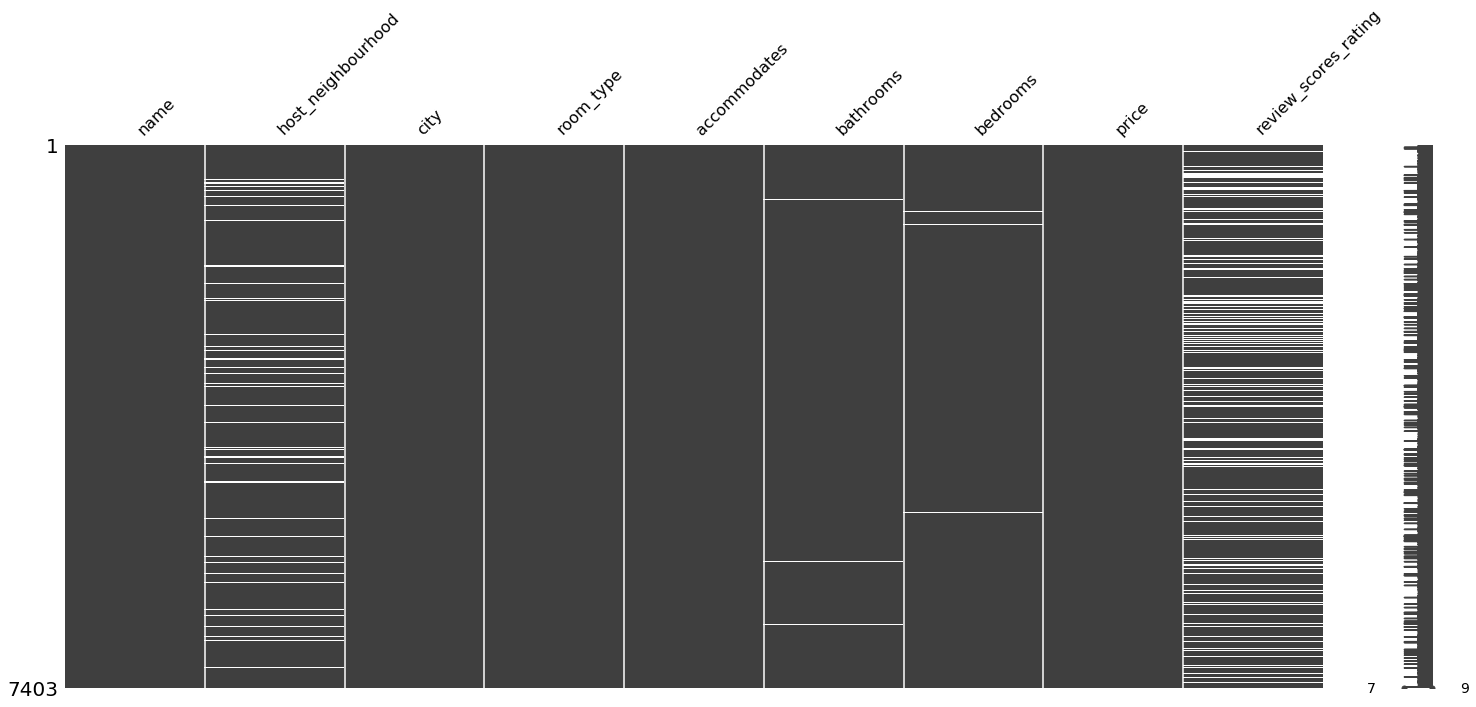

In [13]:
import missingno as msno

msno.matrix(full_data)

##### We see that we are missing quite a bit of data in host_neighborhood and review_scores_rating

##### For number of bathrooms and bedrooms, we only have a few missing values, so we wouldn't lose data if we dropped these values

##### For host_neighborhood, we can categorically encode them as having missing values, this will be dealt later on

##### Finally, review_score_rating is a rating that is based of a 100. I don't think it's a good idea to replace it with mean/median but we can create a new columns based off whether there are missing data on this column instead

In [14]:
full_data.shape[0] - full_data.review_scores_rating.isna().sum()

5943

#### <font color='#eb3483'>Correlation Matrix</font>

#### Here, we use a correlation matrix to understand the association between the variables in our chosen dataset

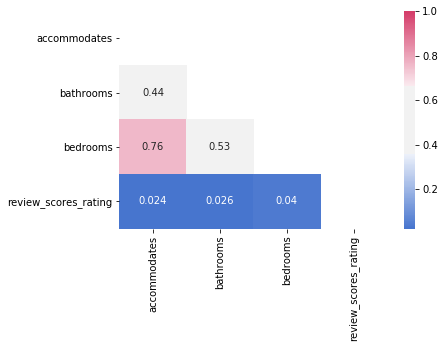

In [15]:
corr = full_data.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n = 7, as_cmap =True), annot = True, mask = mask)

#### <font color='#eb3483'>Data Types</font>

##### One might notice that we need to change price from object to float. This is primarily due to the fact that it's in the dollar + decimals format

In [16]:
full_data.dtypes

name                     object
host_neighbourhood       object
city                     object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
price                    object
review_scores_rating    float64
dtype: object

#### <font color='#eb3483'>Converting Dollar to float</font>

In [17]:
from re import sub
from decimal import Decimal

money = '$6,150,593.22'
value = Decimal(sub(r'[^\d.]', '', money))

def money_to_float(currency):
    '''
    INPUT:
    currency - A dollar string (e.g. "$ 5")
    
    OUTPUT:
    a float that is the float representation of that dollar String
        (e.g. "$5.6" -> 5.6)
        "$6.78" -> 6.78
    '''
    return float(Decimal(sub(r'[^\d.]', '', currency)))

In [18]:
boston_data.price = boston_data.price.apply(money_to_float)

In [19]:
seattle_data.price = seattle_data.price.apply(money_to_float)

In [20]:
full_data.price = full_data.price.apply(money_to_float)

#### <font color='#eb3483'>Categorical Data</font>

##### There are only three categorical data that we care about (and makes sense). This is host_neigborhood, room_type and city

In [21]:
full_data.dtypes

name                     object
host_neighbourhood       object
city                     object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
price                   float64
review_scores_rating    float64
dtype: object

In [22]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = ['host_neighbourhood', 'city', 'room_type']

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [23]:
cleaned_data = create_dummy_df(full_data, cat_cols_lst, True)

In [24]:
cleaned_data.head()

,name,accommodates,bathrooms,bedrooms,price,review_scores_rating,host_neighbourhood_Allston-Brighton,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,...,city_boston,"city_dorchester, boston",city_east Boston,city_seattle,city_波士顿,city_西雅图,city_nan,room_type_Private room,room_type_Shared room,room_type_nan
0,Sunny Bungalow in the City,4,1.5,2.0,250.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charming room in pet friendly apt,2,1.0,1.0,65.0,94.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Mexican Folk Art Haven in Boston,2,1.0,1.0,65.0,98.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Spacious Sunny Bedroom Suite in Historic Home,4,1.0,1.0,75.0,100.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Come Home to Boston,2,1.5,1.0,79.0,99.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### <font color='#eb3483'>Outliers</font>

#### The next thng we should do is check for outliers for the price variables


#### I will use the IQR method, where we find Q1 and Q3 and remove any values that lies outside of that

In [25]:
Q1_boston = np.percentile(boston_data['price'], 25, interpolation = 'midpoint')
Q3_boston = np.percentile(boston_data['price'], 75, interpolation = 'midpoint')

In [26]:
boston_data_no_outlier = boston_data[(boston_data['price'] > Q1_boston) & (boston_data['price'] < Q3_boston)]

In [27]:
Q1_seattle = np.percentile(seattle_data['price'], 25, interpolation = 'midpoint')
Q3_seattle = np.percentile(seattle_data['price'], 75, interpolation = 'midpoint')

In [28]:
seattle_data_no_outlier = seattle_data[(seattle_data['price'] > Q1_seattle) & (seattle_data['price'] < Q3_seattle)]

In [29]:
Q1 = np.percentile(full_data['price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(full_data['price'], 75, interpolation = 'midpoint')

In [30]:
full_data_no_outlier = full_data[(full_data['price'] > Q1) & (full_data['price'] < Q3)]

####  <font color='#eb3483'>Visualization</font>

##### Here are some of the questions that I wanted to ask and find out

### <font color='#008080'>How do the price rates differ between Boston and Seattle's airbnb on average?</font>

#### In this question, we delve in into the price rates of Boston and Seattle's Airbnb. It's important to separate them to see their shape individually

Text(0.5, 1.0, 'Distirbution of Price in the Boston Airbnb dataset')

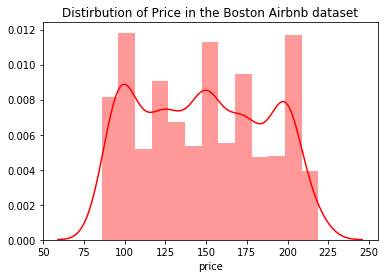

In [31]:
ax = sns.distplot(boston_data_no_outlier['price'], color = 'red')
ax.set_title('Distirbution of Price in the Boston Airbnb dataset')

#### The Boston's price seems very uniform betweem 87.5 to 220 dollar

Text(0.5, 1.0, 'Distirbution of Price in the Seattle Airbnb dataset')

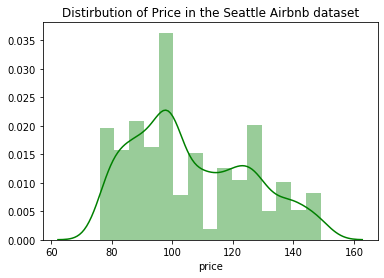

In [32]:
ax = sns.distplot(seattle_data_no_outlier['price'], color = 'green')
ax.set_title('Distirbution of Price in the Seattle Airbnb dataset')

#### The Seattle's price is a bit more right skewed with most of the prices being around the 100 dollar mark

### <font color='#eb3483'>Distribution of Price for Boston and Seattle - Combined</font>

#### It's more important to combine the two to get a better idea of the comparison

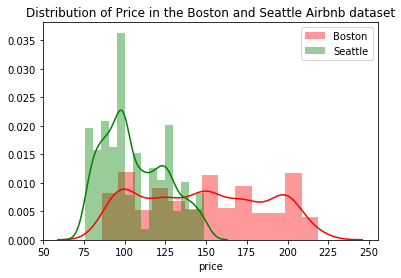

In [33]:
ax = sns.distplot(boston_data_no_outlier['price'], color = 'red', label="Boston")
ax = sns.distplot(seattle_data_no_outlier['price'], color = 'green', label="Seattle")
ax.set_title('Distribution of Price in the Boston and Seattle Airbnb dataset')
ax.legend()

#### Here, we can say with confidence that on average the Airbnb price's tend to be lower in Seattle than Boston. While, there is a significant overlap, we can barely see any of the Seattle's price go beyond 150 dollar

### <font color='#008080'>How do the Review Score differ between Boston and Seattle's airbnb on average?</font>

#### Here, we are just going to straight ahead plot the distribution of review scores between the two. 

Text(0.5, 0, 'review scores')

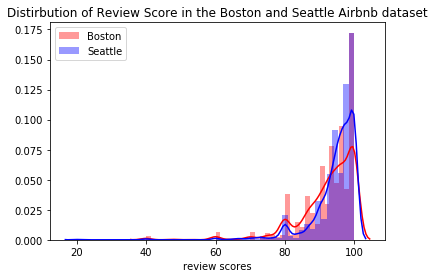

In [34]:
ax = sns.distplot(boston_data_no_outlier['review_scores_rating'], color = 'red', label="Boston")
ax = sns.distplot(seattle_data_no_outlier['review_scores_rating'], color = 'blue', label="Seattle")
ax.set_title('Distirbution of Review Score in the Boston and Seattle Airbnb dataset')
ax.legend()
ax.set_xlabel('review scores')

#### What's interesting to note here is that while you can see that the Seattle's distributin line seems higher at the high end (around 100), we can not really conclude that there is a difference because the distribution isn't split like the one we've seen before. Here most of the review scores are intersectin and therefore we cannot make any conclusion about the difference in review scores. 

### <font color='#008080'>Are certain types of room preferred over others?</font> 

#### For this question, I decided to do a side by side barplot to give an idea on whether there are difference in room types between the two city. Since we are comparin two categorical variable, this barplot is perfect in understanding the difference in frequency between the two.

In [35]:
boston_counts = boston_data_no_outlier['room_type'].value_counts().tolist()
seattle_counts = seattle_data_no_outlier['room_type'].value_counts().tolist()

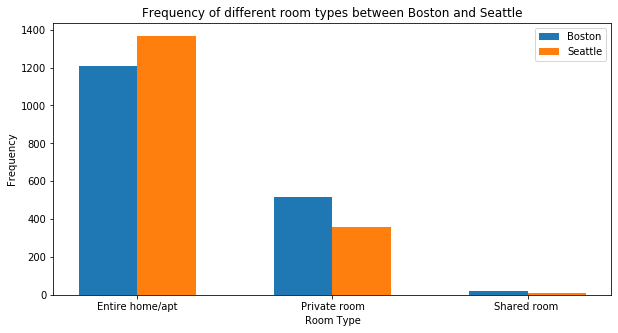

In [36]:
N = 3

# Data on X-axis
blue_bar = boston_counts
orange_bar = seattle_counts

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Boston')
plt.bar(ind + width, orange_bar, width, label='Seattle')

plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Frequency of different room types between Boston and Seattle')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Entire home/apt', 'Private room', 'Shared room '))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### The main conclusion is that Entire home and apartment are the most common room types in an AIrbnb's listing followed by private room and uncommonly, shared room. The trend is similar across Boston and Seattle and therefore we cannot make any further discussion between difference in preference between the two cities. 

### <font color='#008080'>Which neighbourhoods appears the most for Boston and Seattle?</font>

#### Here we are interested in which specific neighborhood in each city can we expect the most listing. Understanding these areas, opens up more avenue for further analysis, we do two separate horizontal barplot, one for each city.

Text(0, 0.5, 'Neighbourhood')

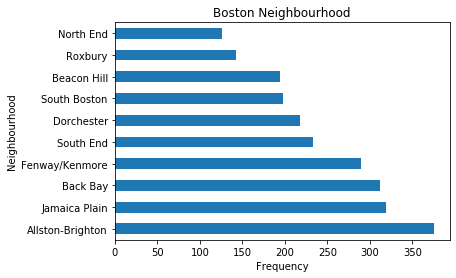

In [37]:
boston_data['host_neighbourhood'].value_counts()[0:10].plot(kind = 'barh')
plt.title('Boston Neighbourhood')
plt.xlabel('Frequency')
plt.ylabel('Neighbourhood')

Text(0, 0.5, 'Neighbourhood')

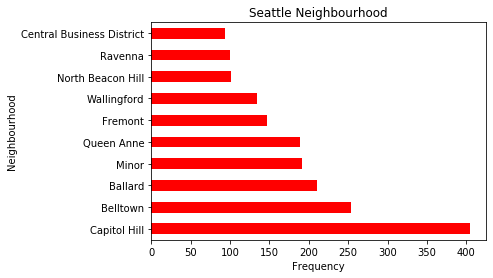

In [38]:
seattle_data['host_neighbourhood'].value_counts()[0:10].plot(kind = 'barh', color='red')
plt.title('Seattle Neighbourhood')
plt.xlabel('Frequency')
plt.ylabel('Neighbourhood')

#### The importance of understanding these details is that it allwos for further investigation in the future. If I wanted to understand more on each city, I may instead start doing an analysis on each of it's neighborhood and make comparisons then.

### Building a Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
full_data_no_outlier.dtypes

name                     object
host_neighbourhood       object
city                     object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
price                   float64
review_scores_rating    float64
dtype: object

In [41]:
X = ['city', 'room_type','accommodates','bathrooms','bedrooms','review_scores_rating']
Y = ['price']

In [42]:
#Create a copy of the dataframe
full_data_no_copy = full_data_no_outlier.copy()
full_data_no_copy = full_data_no_copy[X]
full_data_y = full_data_no_outlier[Y]
#Pull a list of the column names of the categorical variables

In [43]:
full_data_cleaned = create_dummy_df(full_data_no_copy, X, True)

### <font color='#eb3483'>Data Modelling</font>

#### <font color='#eb3483'>Splitting into training and testing</font> 


In [44]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing, where test size = 0.33, random_state = 42 for replayability
X_train, X_test, y_train, y_test = train_test_split(
     full_data_cleaned, full_data_y, test_size=0.33, random_state=42)

####  <font color='#eb3483'>Defining model</font>

In [45]:
lin_model = LinearRegression()

In [46]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### <font color='#eb3483'>Making predictions</font> 

In [47]:
predictions = lin_model.predict(X_test)

#### <font color='#eb3483'>Calculating Error</font> 

#### Using mean squared error to compare difference of actual y_test and predicted y_test squared

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

1.656251421938674e+26

#### <font color='#eb3483'>Using Ridge Regression</font>

#### Redoing all of the steps above

In [49]:
from sklearn.linear_model import Ridge

ridgeRegression = Ridge()

In [50]:
ridgeRegression.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
predictions_r = ridgeRegression.predict(X_test)

In [52]:
mean_squared_error(y_test, predictions_r)

732.6137982951672

#### <font color='#eb3483'>The ridge model can be seen to do so much better using ridge than Linear</font>

### <font color='#eb3483'>Evaluate the Results</font>

#### The results showed key difference and similarities between Boston and Seattle. We can see that they both have the same room types and review scores. The main difference lies in the price of Airbnb's listing where Seattle's listing are on average cheaper. 

#### Another interesting observation is the choice of model. Here a Ridge regression seems to perform a lot better and this si due 